In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def build_DAE_model(train_data):
    inputs = Input(shape=(train_data.shape[1],))
    encoded = Dense(128, activation="relu")(inputs)
    encoded = Dense(64, activation="relu")(encoded)
    encoded = Dense(32, activation="relu")(encoded)
    encoded = Dense(64, activation="relu")(encoded)
    encoded = Dense(128, activation="relu")(encoded)
    outputs = Dense(train_data.shape[1], activation="relu")(encoded)
    
    model = Model(inputs, outputs)
    model.compile(loss="binary_crossentropy", optimizer="adadelta")
    return model

def preprocess_mnist_data(train_data, test_data):
    train_data = train_data.astype("float32") / 255
    test_data = test_data.astype("float32") / 255
    train_data = train_data.reshape((train_data.shape[0], np.prod(train_data.shape[1:])))
    test_data = test_data.reshape((test_data.shape[0], np.prod(test_data.shape[1:])))
    return train_data, test_data

def train_model(model, train_data, test_data, epochs):
    history = model.fit(train_data, train_data, epochs=epochs, batch_size=128,
              shuffle=True, validation_data=(test_data,test_data))
    return history

def visual_train_status(history):
    print(history.history.keys())
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
#     acc = history.history["accuracy"]
#     val_acc = history.history["val_accuracy"]
    epochs = range(1, len(loss)+1)
    
    plt.figure(figsize=(12,3))
#     plt.subplot(121)
    plt.plot(epochs, loss, "bo-", label="Training Loss")
    plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()    
#     plt.subplot(122)
#     plt.plot(epochs, acc, "bo-", label="Training Acc")
#     plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
#     plt.title('model accuracy')
#     plt.ylabel('accuracy')
#     plt.xlabel('epochs')
#     plt.legend()
    plt.show()

In [12]:
(train_data, _), (test_data, _) = mnist.load_data()
train_data, test_data = preprocess_mnist_data(train_data, test_data)

model = build_DAE_model(train_data)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 3s 50us/sample - loss: 1.2431 - val_loss: 1.2519
Epoch 2/3
60000/60000 [==============================] - 2s 40us/sample - loss: 1.2267 - val_loss: 1.2360
Epoch 3/3
60000/60000 [==============================] - 3s 43us/sample - loss: 1.2111 - val_loss: 1.2201


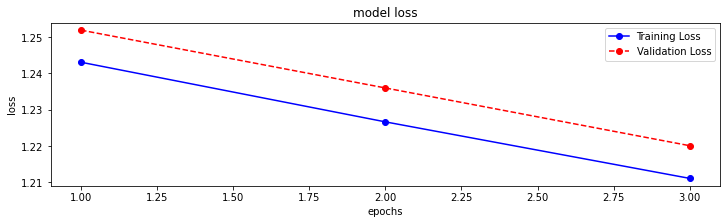

In [13]:
history = train_model(model, train_data, test_data, epochs=3)
visual_train_status(history)

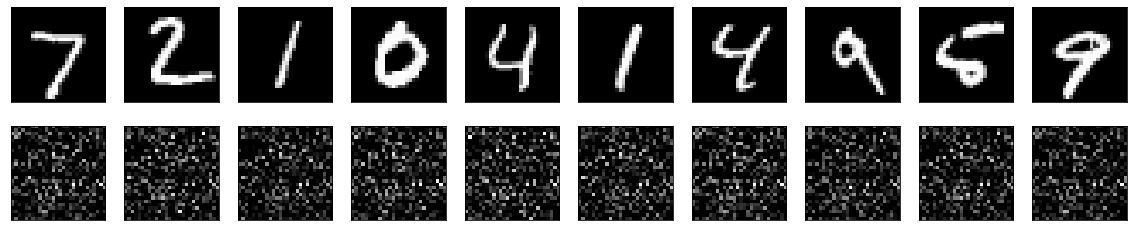

In [14]:
decoded_imgs = model.predict(test_data)
n = 10  #輸出10個數字
plt.figure(figsize=(20, 4))
for i in range(n):
    #輸出原本的圖片
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_data[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #輸出模型結果圖片
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()